# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,bethel,41.3712,-73.4140,305.64,71,0,3.09,US,1721072836
1,1,thinadhoo,0.5333,72.9333,302.12,73,100,2.92,MV,1721072838
2,2,ribeira grande,38.5167,-28.7000,297.47,88,40,5.66,PT,1721072839
3,3,daru,-9.0763,143.2092,296.65,76,100,2.88,PG,1721072841
4,4,port-aux-francais,-49.3500,70.2167,275.03,76,83,14.83,TF,1721072843


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

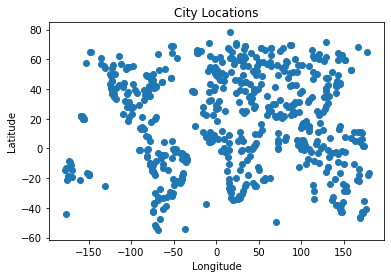

In [4]:
import matplotlib.pyplot as plt

# Configure the map plot
plt.scatter(city_data_df["Lng"], city_data_df["Lat"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("City Locations")


# Display the map
plt.show()

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [7]:
city_data_cleaned_df = city_data_df.loc[((city_data_df["Max Temp"] <= 1000.0) & (city_data_df["Max Temp"] >= 300.0))\
                                 & (city_data_df["Cloudiness"] == 20),:]

# Drop any rows with null values
city_data_cleaned_df = city_data_cleaned_df.dropna(how="any")

# Display sample data
city_data_cleaned_df.head(5)

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
92,92,georgetown,5.4112,100.3354,301.11,83,20,0.51,MY,1721072989
112,112,broome,42.2506,-75.8330,307.09,60,20,4.12,US,1721073022
124,124,roma,43.2128,-75.4557,306.38,52,20,2.57,US,1721073043
154,154,metlili chaamba,32.2667,3.6333,316.67,8,20,2.57,DZ,1721073093
185,185,bennington,42.8781,-73.1968,306.35,53,20,4.12,US,1721073142


### Step 3: Create a new DataFrame called `hotel_df`.

In [8]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
cleaned_hotel_df = city_data_cleaned_df[["City","Country","Lat","Lng","Humidity"]]

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
cleaned_hotel_df["Hotel Name"] = ""

# Display sample data
cleaned_hotel_df.head(5)

<ipython-input-8-25a4fadd7025>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_hotel_df["Hotel Name"] = ""


,City,Country,Lat,Lng,Humidity,Hotel Name
92,georgetown,MY,5.4112,100.3354,83,
112,broome,US,42.2506,-75.8330,60,
124,roma,US,43.2128,-75.4557,52,
154,metlili chaamba,DZ,32.2667,3.6333,8,
185,bennington,US,42.8781,-73.1968,53,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [14]:
# Set parameters to search for a hotel
radius = 5000
params = {
    "apiKey":geoapify_key,
    "limit":10,
    "categories":"accommodation.hotel"
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in cleaned_hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
   for index, row in cleaned_hotel_df.iterrows():
    lat = row["Lat"]
    lon = row["Lng"]

    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{lon},{lat},{radius}"
    params["bias"] = f"proximity:{lon},{lat}"

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionary
    name_address = requests.get(base_url, params=params)

    # Convert the API response to JSON format
    name_address = name_address.json()

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        cleaned_hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        cleaned_hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{cleaned_hotel_df.loc[index, 'City']} - nearest hotel: {cleaned_hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
cleaned_hotel_df

Starting hotel search
georgetown - nearest hotel: Page 63 hostel
broome - nearest hotel: No hotel found
roma - nearest hotel: Wingate by Wyndham Rome
metlili chaamba - nearest hotel: No hotel found
bennington - nearest hotel: SOUTH SHIRE a Little Hotel
saipan - nearest hotel: Chalan Kanoa Beach Hotel
rock springs - nearest hotel: Sands Inn
lower sackville - nearest hotel: No hotel found
fort st. john - nearest hotel: Fort St. John Motor Inn
kingston - nearest hotel: Aphrodite Hotel
georgetown - nearest hotel: Page 63 hostel
broome - nearest hotel: No hotel found
roma - nearest hotel: Wingate by Wyndham Rome
metlili chaamba - nearest hotel: No hotel found
bennington - nearest hotel: SOUTH SHIRE a Little Hotel
saipan - nearest hotel: Chalan Kanoa Beach Hotel
rock springs - nearest hotel: Sands Inn
lower sackville - nearest hotel: No hotel found
fort st. john - nearest hotel: Fort St. John Motor Inn
kingston - nearest hotel: Aphrodite Hotel
georgetown - nearest hotel: Page 63 hostel
broom

KeyboardInterrupt: 